In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import fish_models
import robofish.io


In [58]:
# create a fish, that always swims straight,
# and turns left, when the wall is too close

class SimpleForwardModel(fish_models.gym_interface.AbstractRaycastBasedModel):
    def choose_action(self, view: np.ndarray):
        # Return speed and turn from view
        speed = np.random.random() * 20.

        if view[6] > 0.95:
            turn = 5 * np.pi
        else: 
            turn = 0
        return speed, turn
    
model = SimpleForwardModel()

In [27]:
raycast = fish_models.gym_interface.Raycast(
            n_wall_raycasts=5,
            n_fish_bins=4,
            fov_angle_fish_bins=np.pi,
            fov_angle_wall_raycasts=np.pi,
            world_bounds=([-50, -50], [50, 50]),
        )



In [28]:
data_folder = Path("data/live_female_female/train")

dset = fish_models.datasets.io_dataset.IoDataset(
    data_folder,
    raycast,
    output_strings=["poses", "actions", "views"],
    reduce_dim=2,
    max_files=10,
)

  0%|          | 0/10 [00:00<?, ?it/s]

Loading data from 10 files.


  0%|          | 0/10 [00:00<?, ?it/s]

Calculating views from 10 files.


100%|██████████| 10/10 [00:21<00:00,  2.15s/it]

Created IoDataset:
Reduced the first 3 dimensions from (10, 2, 8989) to (179780)
poses	(179780, 3):	consisting of x, y, calc_ori_rad.
actions	(179760, 2):	consisting of speed[cm/s] and turn [rad/s].
views	(179760, 9):	4 fish_bins and 5 wall ray casts.



In [59]:
generator = fish_models.gym_interface.TrackGeneratorGymRaycast(
    model, raycast, [100,100], 25
)

track = generator.create_track(n_guppies=1, trackset_len=1000)
print(track.shape)

100%|██████████| 999/999 [00:00<00:00, 1598.38it/s]

(1, 1000, 3)


In [53]:
f = generator.as_io_file(track)
f.save_as("output/simple_forward.hdf5")

<HDF5 file "5bae5f58-d067-45d9-8ad5-7b4d915efb56" (mode r+)>

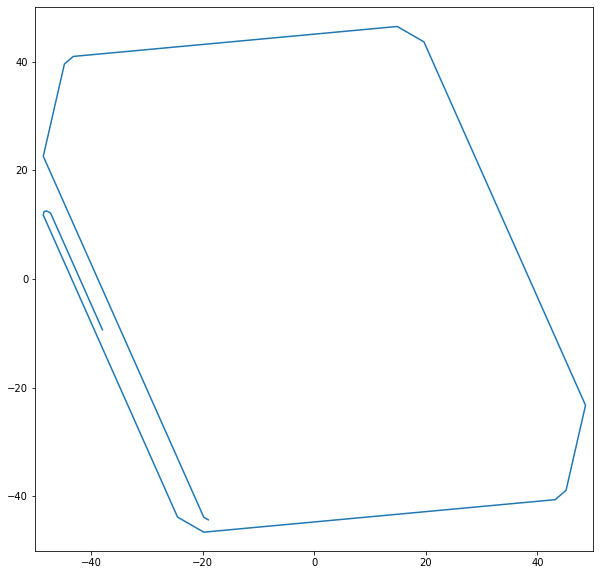

In [60]:
plt.figure(figsize=(10,10))
plt.xlim(-50,50)
plt.ylim(-50,50)
for fish_id in range(1):
    plt.plot(track[fish_id, :, 0], track[fish_id, :, 1])
plt.show()